# Sample usage

In [1]:
from model_criticism_mmd import ModelTrainerTorchBackend

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas

# Scenario-1

In [3]:
x = np.random.normal(3, 0.5, size=(500, 2))
y = np.random.normal(3, 0.5, size=(500, 2))

In [14]:
df_x = pandas.DataFrame(x)
df_x['label'] = 'green'
df_y = pandas.DataFrame(y)
df_y['label'] = 'red'
df_data_scenario_1 = pandas.concat([df_x, df_y])
df_data_scenario_1.columns = ['dim0', 'dim1', 'label']

<AxesSubplot:xlabel='dim0', ylabel='dim1'>

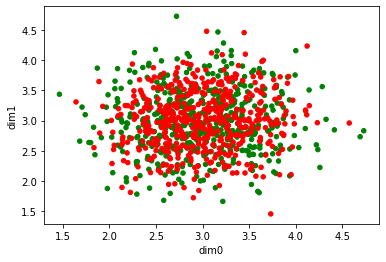

In [15]:
df_data_scenario_1.plot.scatter(x='dim0', y='dim1', c='label')

In [18]:
n_train = 400
x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

In [19]:
trainer = ModelTrainerTorchBackend()
trained_obj = trainer.train(x_train, y_train, num_epochs=1000, batchsize=200)

input data N(sample-size)=400, N(dimension)=2
Getting median initial sigma value...
initial sigma by median-heuristics 0.658
Validation at 0. MMD^2 = 0.020904880966629236, obj-value = [-0.72237442] at sigma = [0.65766859]
[before optimization] sigma value = [0.65766859]
     5: avg train MMD^2 0.008719417418989794 obj [-1.06830981],  avg val MMD^2 0.024134397945803854  obj [-0.65881432]  elapsed: 0.0 sigma: [0.58109041]
    25: avg train MMD^2 0.013183762333311734 obj [-3.64924956],  avg val MMD^2 0.02433034531741618  obj [-3.49885671]  elapsed: 0.0 sigma: [0.03384169]
    50: avg train MMD^2 0.01336042298496043 obj [-4.86292959],  avg val MMD^2 0.024992846774703304  obj [-5.52117475]  elapsed: 0.0 sigma: [0.00484842]
   100: avg train MMD^2 0.0133141416513149 obj [-4.85874689],  avg val MMD^2 0.0249997147180586  obj [-5.52144951]  elapsed: 0.0 sigma: [0.00364957]
   200: avg train MMD^2 0.013348474393680403 obj [-4.86209482],  avg val MMD^2 0.024999999924186066  obj [-5.52146091]  ela

In [21]:
print(f'Preffered parameters sigma = {trained_obj.sigma} / scales = {trained_obj.scales}')

Preffered parameters sigma = -6.024131617116132 / scales = [2.6672196 2.826548 ]


In [24]:
mmd2, ratio = trainer.mmd_distance(x_test, y_test)
print(f'MMD^2 distance = {mmd2}')

MMD^2 distance = 0.0009517840710888681


# Scenario-2

In [25]:
x = np.random.normal(3, 0.5, size=(500, 2))
y = np.random.normal(10, 5.5, size=(500, 2))

In [26]:
df_x = pandas.DataFrame(x)
df_x['label'] = 'green'
df_y = pandas.DataFrame(y)
df_y['label'] = 'red'
df_data_scenario_1 = pandas.concat([df_x, df_y])
df_data_scenario_1.columns = ['dim0', 'dim1', 'label']

<AxesSubplot:xlabel='dim0', ylabel='dim1'>

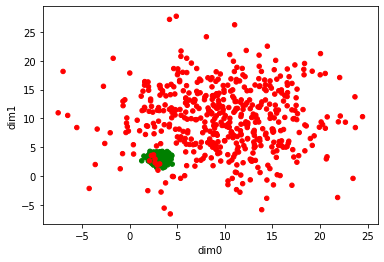

In [27]:
df_data_scenario_1.plot.scatter(x='dim0', y='dim1', c='label')

In [28]:
n_train = 400
x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

In [29]:
trainer = ModelTrainerTorchBackend()
trained_obj = trainer.train(x_train, y_train, num_epochs=1000, batchsize=200)

input data N(sample-size)=400, N(dimension)=2
Getting median initial sigma value...
initial sigma by median-heuristics 4.5
Validation at 0. MMD^2 = 0.7899133428429618, obj-value = [-2.71752921] at sigma = [4.50136166]
[before optimization] sigma value = [4.50136166]
     5: avg train MMD^2 0.8976886266151618 obj [-3.07849254],  avg val MMD^2 0.9955116789572841  obj [-3.05067791]  elapsed: 0.0 sigma: [3.39027105]
    25: avg train MMD^2 0.8774072711487189 obj [-3.68626893],  avg val MMD^2 0.9033716634251551  obj [-3.50036843]  elapsed: 0.0 sigma: [2.23829597]
    50: avg train MMD^2 0.8482236659836533 obj [-3.68226781],  avg val MMD^2 0.8728687728590914  obj [-3.49356118]  elapsed: 0.0 sigma: [2.0706513]
   100: avg train MMD^2 0.8473423427945392 obj [-3.7076139],  avg val MMD^2 0.871559870390295  obj [-3.49259201]  elapsed: 0.0 sigma: [2.06595515]
   200: avg train MMD^2 0.8497184840439072 obj [-3.68797049],  avg val MMD^2 0.8768974180356887  obj [-3.49569463]  elapsed: 0.0 sigma: [2.0

In [30]:
print(f'Preffered parameters sigma = {trained_obj.sigma} / scales = {trained_obj.scales}')
mmd2, ratio = trainer.mmd_distance(x_test, y_test)
print(f'MMD^2 distance = {mmd2}')

Preffered parameters sigma = 0.7459361068370757 / scales = [1.1743711 1.2708918]
MMD^2 distance = 0.47058921191154396
